In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [3]:
data = pd.read_csv('./data/ENG.csv', delimiter=',')
condicoes = [
    (data['FTR'] == 'D'),
    (data['FTR'] == 'H'),
    (data['FTR'] == 'A')
]
valores = [0, 1, 2]
data['FTR'] = np.select(condicoes, valores, default=np.nan)
display(data)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,2.0,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,1.0,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,0.0,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,1.0,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,2.0,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,E0,30/12/2023,15:00,Wolves,Everton,3,0,1.0,1,0,...,1.75,0.00,2.10,1.83,2.10,1.85,2.13,1.91,2.04,1.84
193,E0,30/12/2023,17:30,Nott'm Forest,Man United,2,1,1.0,0,0,...,2.14,0.25,1.99,1.94,2.00,1.93,2.09,1.94,1.97,1.89
194,E0,31/12/2023,14:00,Fulham,Arsenal,2,1,1.0,1,1,...,2.04,1.00,1.89,2.04,1.87,2.06,2.02,2.07,1.89,1.98
195,E0,31/12/2023,14:00,Tottenham,Bournemouth,3,1,1.0,1,0,...,3.41,-0.75,1.98,1.95,2.00,1.93,2.00,2.00,1.93,1.93


In [4]:
dataPreFiltred = data[['FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]
novo_nome_colunas = {'FTHG': 'Gols_time_casa', 'FTAG': 'Gols_time_visitante', 'FTR': 'Resultado_jogo', 'HS': 'Chutes_time_casa', 'AS': 'Chutes_time_visitante',
'HST': 'Chutes_time_casa_alvo', 'AST': 'Chutes_time_visitante_alvo', 'HC': 'Escanteios_time_casa', 'AC': 'Escanteios_time_visitante', 'HF': 'Faltas_cometidas_time_casa',
'AF': 'Faltas_cometidas_time_visitante', 'HY': 'Cartao_amarelo_time_casa', 'AY': 'Cartao_amarelo_time_visitante', 'HR': 'Cartao_vermelho_time_casa', 'AR': 'Cartao_vermelho_visitante'}
dataPreFiltred.rename(columns=novo_nome_colunas, inplace=True)
display(dataPreFiltred)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_8676\2960247341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPreFiltred.rename(columns=novo_nome_colunas, inplace=True)


,Gols_time_casa,Gols_time_visitante,Resultado_jogo,Chutes_time_casa,Chutes_time_visitante,Chutes_time_casa_alvo,Chutes_time_visitante_alvo,Escanteios_time_casa,Escanteios_time_visitante,Faltas_cometidas_time_casa,Faltas_cometidas_time_visitante,Cartao_amarelo_time_casa,Cartao_amarelo_time_visitante,Cartao_vermelho_time_casa,Cartao_vermelho_visitante
0,0,3,2.0,6,17,1,8,6,5,11,8,0,0,1,0
1,2,1,1.0,15,6,7,2,8,3,12,12,2,2,0,0
2,1,1,0.0,14,16,5,3,10,4,9,14,1,4,0,0
3,4,1,1.0,27,9,12,3,6,7,11,12,2,2,0,0
4,0,1,2.0,19,9,9,2,10,4,12,6,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,3,0,1.0,12,10,6,0,5,2,9,14,2,3,0,0
193,2,1,1.0,8,10,2,5,4,5,9,11,2,4,0,0
194,2,1,1.0,15,13,4,3,5,4,11,10,4,1,0,0
195,3,1,1.0,12,24,6,4,4,13,9,18,3,3,0,0


In [5]:
matches = dataPreFiltred.shape[0]
features = dataPreFiltred.shape[1] - 1
home_win = len(dataPreFiltred[dataPreFiltred.Resultado_jogo == 1])
away_win = len(dataPreFiltred[dataPreFiltred.Resultado_jogo == 2])
draw = len(dataPreFiltred[dataPreFiltred.Resultado_jogo == 0])
val = [home_win, away_win, draw]
win_rate = (float(home_win)/(matches)) * 100
print('Total de jogos: ', matches)
print('Total de colunas: ', features)
print('Total de jogos ganhos em casa: ', home_win)
print('Total de jogos ganhos fora de casa: ', away_win)
print('Total de empates: ', draw)
print('Percentual de jogos ganhos em casa: {: .2f}' .format(win_rate))

Total de jogos:  197
Total de colunas:  14
Total de jogos ganhos em casa:  95
Total de jogos ganhos fora de casa:  66
Total de empates:  36
Percentual de jogos ganhos em casa:  48.22


In [6]:
#separa as features
features = dataPreFiltred.drop(['Resultado_jogo'], axis=1)
#separa as labels
labels = dataPreFiltred['Resultado_jogo']
features_list = ()

In [9]:
#Escoolhendo as melhores features com Kbest

features_list = ('Gols_time_casa','Gols_time_visitante','Chutes_time_casa','Chutes_time_visitante','Chutes_time_casa_alvo','Chutes_time_visitante_alvo','Escanteios_time_casa'
,'Escanteios_time_visitante','Faltas_cometidas_time_casa','Faltas_cometidas_time_visitante','Cartao_amarelo_time_casa', 'Cartao_amarelo_time_visitante', 'Cartao_vermelho_time_casa', 'Cartao_vermelho_visitante')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()

print ('')
print ("Melhores features:")

print (k_best_features_final)


Melhores features:
{'Gols_time_visitante': 89.49740612585302, 'Chutes_time_casa': 68.6099149997871, 'Escanteios_time_casa': 22.409174293796198, 'Chutes_time_visitante_alvo': 21.27199073130569, 'Chutes_time_casa_alvo': 10.868915677267468, 'Cartao_amarelo_time_casa': 6.2506377949757725, 'Chutes_time_visitante': 5.078633685593021, 'Faltas_cometidas_time_casa': 2.262056281982563, 'Cartao_vermelho_time_casa': 2.154617411499354, 'Cartao_vermelho_visitante': 1.1309856307046864, 'Faltas_cometidas_time_visitante': 0.657602504889596, 'Escanteios_time_visitante': 0.4644712670130609, 'Cartao_amarelo_time_visitante': 0.37548690371755894}


In [12]:
#separa as features com base nas melhores features para treinamento
features = dataPreFiltred.drop(['Resultado_jogo', 'Faltas_cometidas_time_visitante','Escanteios_time_visitante', 'Cartao_amarelo_time_visitante' ],axis=1)
#separa as labels para treinamento
labels = dataPreFiltred['Resultado_jogo']
# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)
display(features)
display(labels)
display(features.shape)

,Gols_time_casa,Gols_time_visitante,Chutes_time_casa,Chutes_time_visitante,Chutes_time_casa_alvo,Chutes_time_visitante_alvo,Escanteios_time_casa,Faltas_cometidas_time_casa,Cartao_amarelo_time_casa,Cartao_vermelho_time_casa,Cartao_vermelho_visitante
0,0,3,6,17,1,8,6,11,0,1,0
1,2,1,15,6,7,2,8,12,2,0,0
2,1,1,14,16,5,3,10,9,1,0,0
3,4,1,27,9,12,3,6,11,2,0,0
4,0,1,19,9,9,2,10,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
192,3,0,12,10,6,0,5,9,2,0,0
193,2,1,8,10,2,5,4,9,2,0,0
194,2,1,15,13,4,3,5,11,4,0,0
195,3,1,12,24,6,4,4,9,3,0,0


0      2.0
1      1.0
2      0.0
3      1.0
4      2.0
      ... 
192    1.0
193    1.0
194    1.0
195    1.0
196    1.0
Name: Resultado_jogo, Length: 197, dtype: float64

(197, 11)

In [13]:
#Separa em treinamento e teste
#Separação manual para manter a ordem cronológica, uma vez que temos informação temporal. 
#Treino linhas [:1932]
#Teste linhas [1932:2155]
#previsão linhas [2155:2280]
X_train = features_scale[:118]
X_test = features_scale[118:157]
y_train = labels[:118]
y_test = labels[118:157]

Naive baeys
Acurácia Naive baeys:0.5897435897435898
F1 Score:0.5897435897435898


<Axes: xlabel='previsao', ylabel='real'>

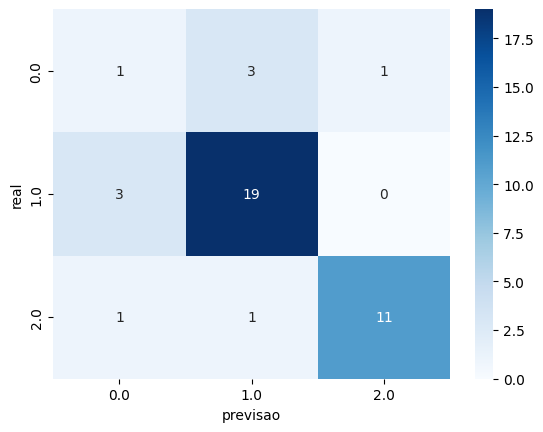

In [16]:
#Treinando e testando os modelos

clf = GaussianNB()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

nb_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='micro')

print ('Naive baeys')
print ('Acurácia Naive baeys:{}'.format(nb_acc))
print ('F1 Score:{}'.format(f1) )
#Executando previsão
previsao = features_scale[157:]

res_full = dataPreFiltred['Resultado_jogo']
res = res_full[157:]
pred = clf.predict(previsao)
df = pd.DataFrame({'real': res, 'previsao': pred})
#matriz de confusão
df=pd.DataFrame(df,columns=['real','previsao' ])
cf_matrix=pd.crosstab(df['real'], df['previsao'], rownames=['real'] , colnames=['previsao'])
sns.heatmap(cf_matrix, annot=True, cmap='Blues')